In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_profiling as pf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("online_shoppers_intention.txt")
df.tail()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12354,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12355,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12356,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12357,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12358,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [3]:
# Data Pre-processing
# Using Label Encoder in sklearn package, to convert categorcal columns into numerical, ordinal ones.
from sklearn.preprocessing import LabelEncoder

In [4]:
LE = LabelEncoder()
df.iloc[:,10] = LE.fit_transform(df['Month'])
df.iloc[:,15] = LE.fit_transform(df['VisitorType'])
df.iloc[:,16] = LE.fit_transform(df['Weekend'])
df.iloc[:,17] = LE.fit_transform(df['Revenue'])

In [5]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,1,0.000000,2,211.25,144,4627.489571,0.001361,0.020664,0.000000,0.0,7,2,2,1,2,2,0,0
1,7,150.357143,1,9.00,221,11431.001240,0.011149,0.021904,1.582473,0.0,7,2,5,1,2,2,1,0
2,3,16.000000,3,86.00,15,2773.500000,0.000000,0.030000,78.811725,0.0,1,2,2,1,2,2,0,0
3,0,0.000000,0,0.00,7,705.833333,0.028571,0.085714,0.000000,0.0,1,5,11,4,1,2,1,0
4,0,0.000000,0,0.00,7,212.500000,0.000000,0.033333,0.000000,0.0,7,3,2,1,11,2,1,0


In [6]:
# Model Building
# Using Logistic Regression to predict the outcome of Revenue, which is a binary classification problem.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

In [7]:
out = df['Revenue']
x = df.drop(['Revenue'], axis = 1)
Xtrain, Xval, Ytrain, Yval = train_test_split(x, out, test_size=0.2, random_state = 60 )
lreg = LogisticRegression()
lreg.fit(Xtrain, Ytrain)
out_pred = lreg.predict(Xval)
out_pred
acc=accuracy_score(Yval, out_pred)

In [8]:
# Using the K-fold cross validation to validate the result for data splitting = 5
model = LogisticRegression()
kfold = KFold(n_splits = 5, shuffle=True)
result = cross_val_score(model, Xtrain, Ytrain, cv=kfold, scoring='accuracy')
result.mean()

0.8818639838425002

The Confusion Matrix


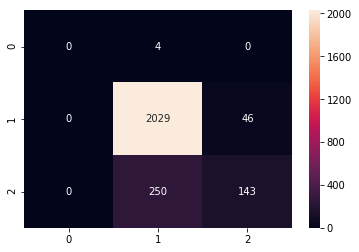

In [9]:
# Printing the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Yval, out_pred)
print("The Confusion Matrix")
cm
plt.figure()
sns.heatmap(cm, annot =True, fmt = "d")
plt.show()

In [10]:
# classification report
from sklearn.metrics import classification_report
print("The full classification report is as follows")
print(classification_report(Yval, out_pred))

The full classification report is as follows
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.89      0.98      0.93      2075
           2       0.76      0.36      0.49       393

   micro avg       0.88      0.88      0.88      2472
   macro avg       0.55      0.45      0.47      2472
weighted avg       0.87      0.88      0.86      2472



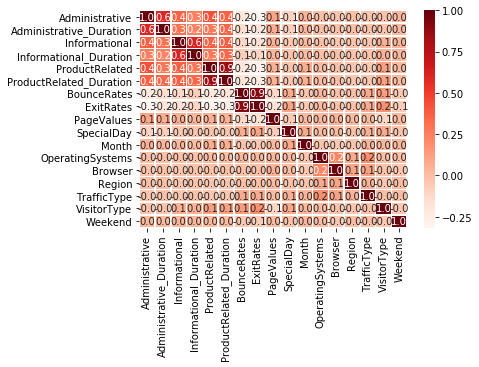

In [11]:
plt.subplots()
sns.heatmap(x.corr(),annot=True,linewidths=.5,fmt= ".1f", cmap = 'Reds')
plt.yticks(rotation= 0)
plt.show()

In [12]:
# Hyper-parametric tuning
from sklearn.model_selection import GridSearchCV
param_grid1 = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}
clf_hyp = GridSearchCV(LogisticRegression(), param_grid1)
clf_hyp.fit(Xtrain, Ytrain)
clf_pred = clf_hyp.predict(Xval)
clf_hyp_acc = accuracy_score(Yval, clf_pred)
print("Accuracy after parameter tuning")
print(clf_hyp_acc)
print(clf_hyp.best_estimator_)

Accuracy after parameter tuning
0.8782362459546925
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [13]:
# Using c = 100 in the logistic regression model
Xtrain, Xval, Ytrain, Yval = train_test_split(x, out, test_size=0.2, random_state = 60 )
lreg = LogisticRegression(C=1000)
lreg.fit(Xtrain, Ytrain)
out_pred = lreg.predict(Xval)
out_pred
acc=accuracy_score(Yval, out_pred)
from sklearn.model_selection import KFold
model = LogisticRegression()
kfold = KFold(n_splits = 5, shuffle=True)
result = cross_val_score(model, Xtrain, Ytrain, cv=kfold, scoring='accuracy')
result.mean()

0.8818638815539472

The Confusion Matrix


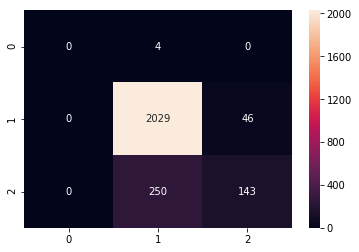

In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Yval, out_pred)
print("The Confusion Matrix")
cm
plt.figure()
sns.heatmap(cm, annot =True, fmt = "d")
plt.show()

The full classification report is as follows
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.89      0.98      0.93      2075
           2       0.76      0.36      0.49       393

   micro avg       0.88      0.88      0.88      2472
   macro avg       0.55      0.45      0.47      2472
weighted avg       0.87      0.88      0.86      2472



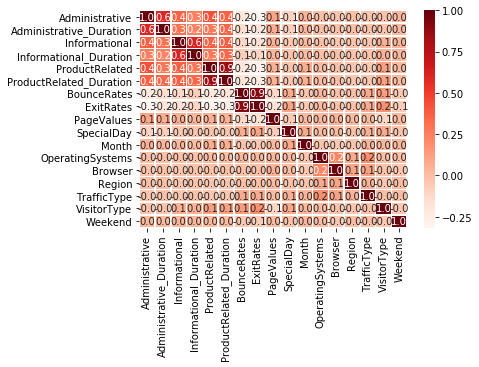

In [15]:
from sklearn.metrics import classification_report
print("The full classification report is as follows")
print(classification_report(Yval, out_pred))
plt.subplots()
sns.heatmap(x.corr(),annot=True,linewidths=.5,fmt= ".1f", cmap = 'Reds')
plt.yticks(rotation= 0)
plt.show()

#### Conclusion
- Applying the Logistic Regression model on Online Shoppers Intention data and validating the results through KFold Cross Validation technique, we find the accuracy of the model is 99.9%. This would seem to be high accuracy for pediction.
- But on further analysis, we find that we fail at the crucial prediction of who will buy the products, ie, Revenue = True. Prediction rate of Revenue = 'True' comes out to be 74.1% and further 36.22% of predicted Revenue = 'True' are correct.
- Upon optimization of the model using GridsearchCV, overall performance remains the same.
- This situation is arising due to high imbalance in data. The ratio of Revenue = 'True' to Revenue = 'False' is very low which is leading to inaccuracy in model prediction.
- To improve the prediction, we have to treat imbalances in the data or perform Feature Selection and go for other models like Recursive Neural Networks(RNN).